## Preparation and Data Collection

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# 1. Load Dataset
df = pd.read_csv('kc_house_data.csv')  # Pastikan file dataset ada di direktori

df

In [56]:
df = df[['id', 'sqft_living', 'price']]
df.head()

,id,sqft_living,price
0,7129300520,1180,221900.0
1,6414100192,2570,538000.0
2,5631500400,770,180000.0
3,2487200875,1960,604000.0
4,1954400510,1680,510000.0


## Data Understanding

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   price        21613 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.7 KB


In [59]:
df.describe()

,id,sqft_living,price
count,2.161300e+04,21613.000000,2.161300e+04
mean,4.580302e+09,2079.899736,5.400881e+05
std,2.876566e+09,918.440897,3.671272e+05
min,1.000102e+06,290.000000,7.500000e+04
25%,2.123049e+09,1427.000000,3.219500e+05
50%,3.904930e+09,1910.000000,4.500000e+05
75%,7.308900e+09,2550.000000,6.450000e+05
max,9.900000e+09,13540.000000,7.700000e+06


In [61]:
df.isnull().sum()

,0
id,0
sqft_living,0
price,0


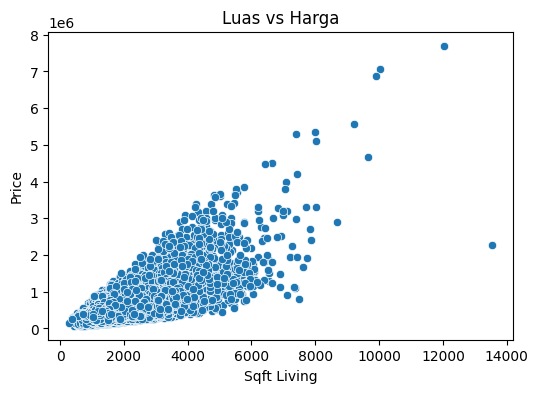

In [70]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Luas vs Harga')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

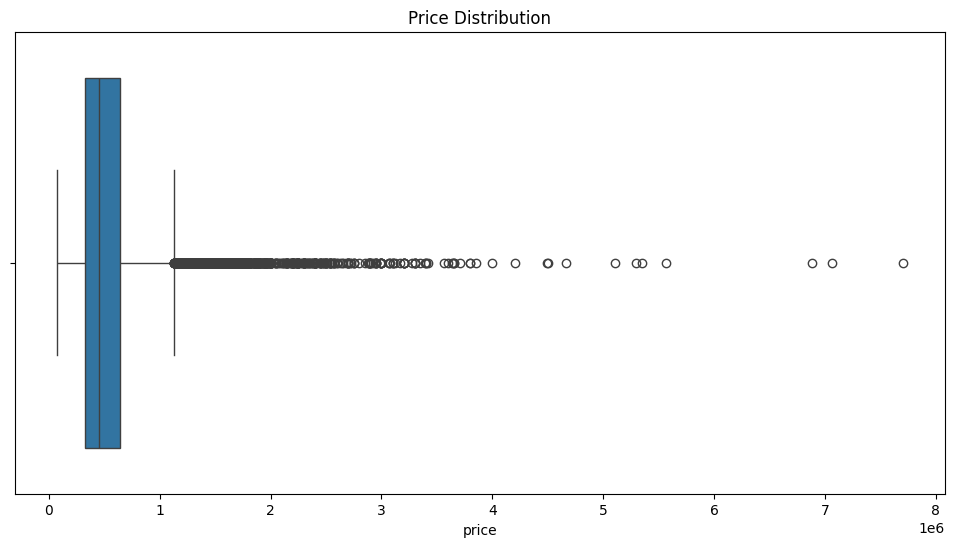

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Price Distribution')
plt.show()

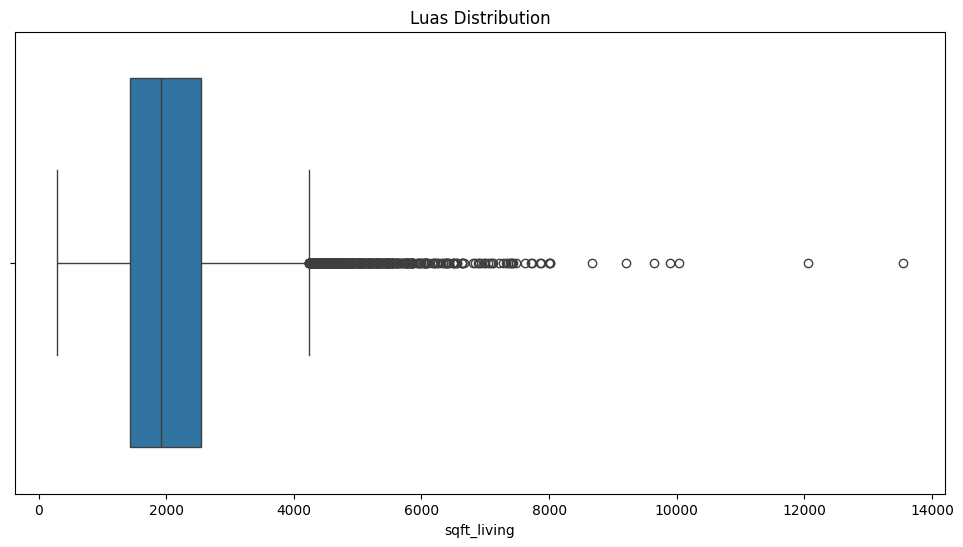

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['sqft_living'])
plt.title('Luas Distribution')
plt.show()

## Data Preprocessing

In [75]:
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_price'] = np.log(df['price'])

print(df.head())

           id  sqft_living     price  log_sqft_living  log_price
0  7129300520         1180  221900.0         7.073270  12.309982
1  6414100192         2570  538000.0         7.851661  13.195614
2  5631500400          770  180000.0         6.646391  12.100712
3  2487200875         1960  604000.0         7.580700  13.311329
4  1954400510         1680  510000.0         7.426549  13.142166


<ipython-input-75-9c68aebe4114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_sqft_living'] = np.log(df['sqft_living'])
<ipython-input-75-9c68aebe4114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log(df['price'])


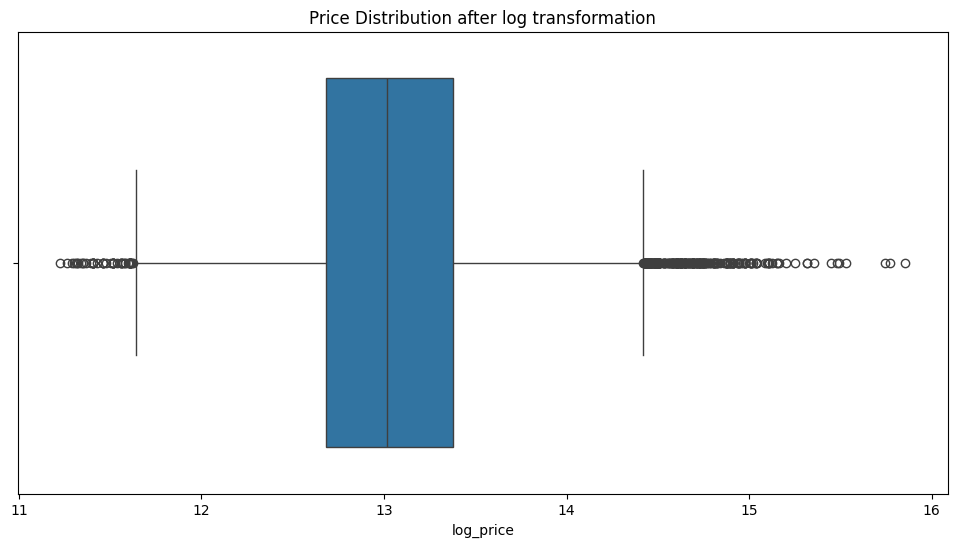

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['log_price'])
plt.title('Price Distribution after log transformation')
plt.show()

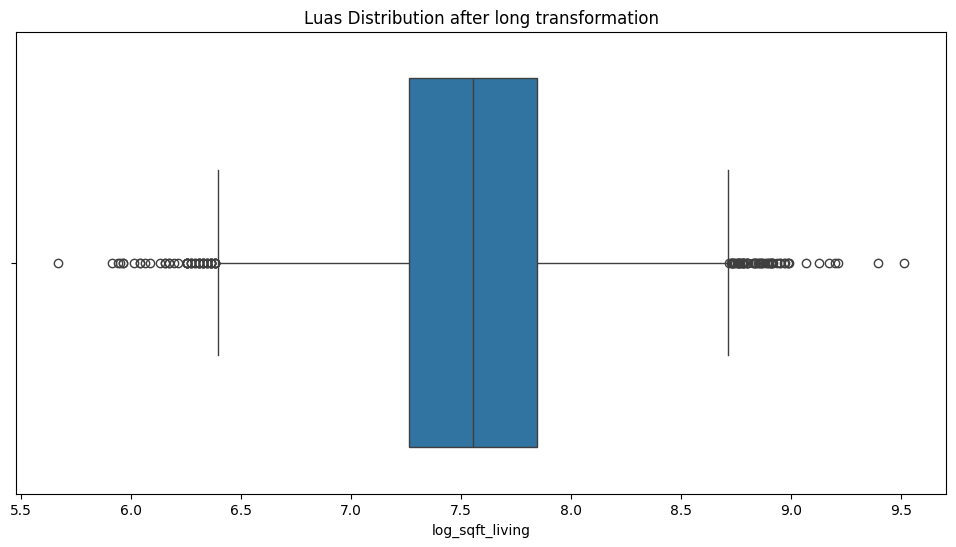

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['log_sqft_living'])
plt.title('Luas Distribution after long transformation')
plt.show()

In [ ]:
#Pemilihan Fitur
X = df[['log_sqft_living']]  # Fitur
y = df['log_price']           # Target


# 3. Split Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## Model Training

In [82]:
# 4. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Koefisien (slope):", model.coef_)
print("Intercept:", model.intercept_)


Koefisien (slope): [0.83317167]
Intercept: 6.756179350977606


## Model Evaluation

In [83]:
# 5. Prediksi dan Evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:}")

MSE: 0.15131182817560335


## Prediction Visualization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


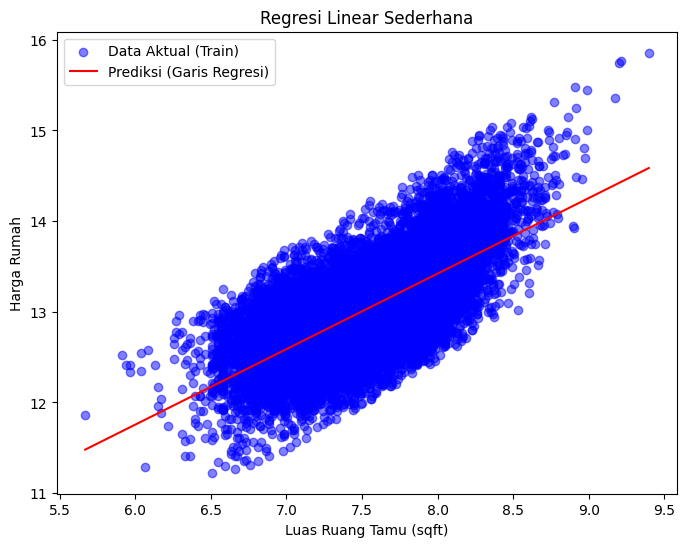

In [84]:
# 6. Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Data Aktual (Train)')

# Garis prediksi
X_line = np.linspace(X_train.min(), X_train.max(), 100)
X_line = X_line.reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', label='Prediksi (Garis Regresi)')

plt.xlabel('Luas Ruang Tamu (sqft)')
plt.ylabel('Harga Rumah')
plt.title('Regresi Linear Sederhana')
plt.legend()
plt.show()

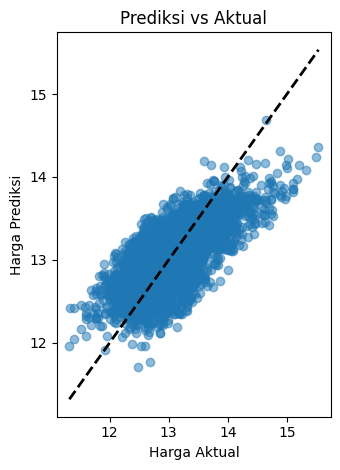

In [85]:
# Plot 2: Perbandingan Prediksi vs Aktual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--',
    lw=2
)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Prediksi vs Aktual')

plt.tight_layout()
plt.show()